Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **05Oct21**

# Homework 03 (05Oct21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: Shubhojit Banerjee

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (30 pts)](#a1) Function approximation with constrained end-points.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(10 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(15 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$) and constrain the end points.
* [Assignment 2 (65 pts)](#a2) Function approximation with constrained end-point derivatives.
 - [2.1)](#a21)(35 pts) Constrained Fourier basis function approximation.
 - [2.2)](#a22)(30 pts) Demonstrate why the approximation results for the end point derivatives can't be improved.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (30 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy.linalg import solve,norm
import math
from scipy.integrate import quad
from numpy.linalg import matrix_rank
from scipy.interpolate import UnivariateSpline
plt.style.use('dark_background')

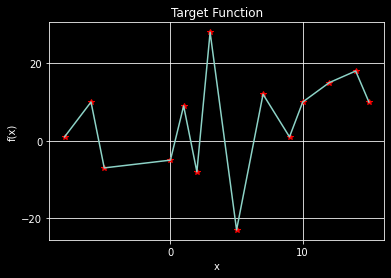

1.0


In [2]:
'''Generate the target function f'''
Shap_point=[(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)]
Shape= np.array(Shap_point)
#print(Shape[:,0])
x_min=Shape[:,0][0]
x_max=Shape[:,0][-1]
m=100
new_x = np.linspace(x_min,x_max,m)
i_p = interp1d(Shape[:,0], Shape[:,1])
new_f= i_p(Shape[:,0])
plt.plot(Shape[:,0], Shape[:,1], '*', color='red')
plt.grid(True)
plt.plot(Shape[:,0],new_f)
plt.title('Target Function')
plt.xlabel('x');plt.ylabel('f(x)')
plt.rcParams.update({'font.size': 22})
plt.show()
print(i_p(x_min))

### <span style="color:blue">[1.2)](#toa)(10 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a continuous approximation equivalent to an infinite number of collocation points ($m\rightarrow\infty$). Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error. Explain why the end points of the approximation do not match the given data.
</span><a id="a12"></a>

In [3]:
'''Build the basis functions'''
wavelength = x_max-x_min
K=2*(math.pi)/wavelength

m=22      
n_pts = max(2*m, 350)
x_pts = np.linspace(x_min, x_max, n_pts)
shift = 0#.2

x_p= np.array([-2,2.5,12])
N = np.array([2,3,2])

sigma_p = [.5,.9,.5]

'''x_p= np.array([-6,2.5,10])
N = np.array([2,3,2])

sigma_p = [.5,.8,.5]'''

'''x_p= np.array([-4,3,10])
N = np.array([2,3,2])

sigma_p = [1, 0.5, 0.5]'''


def basis(x,x_p,shift,sigma_p,j):
    #Z_b=np.zeros((len(x),2*N+1))
    #for j in range((2*N+1)):
    if (j==0):
        Z_b=np.exp(-((x-x_p)**2)/2*sigma_p**2)
    elif (j%2)==1:
        Z_b=(np.exp(-((x-x_p)**2)/2*sigma_p**2))*((np.cos(((j//2)+1)*K*x)+(shift*(x**2)*0.5)))
    elif (j%2)==0:
        Z_b=(np.exp(-((x-x_p)**2)/2*sigma_p**2))*((np.sin(((j//2)+1)*K*x)+(shift*(x**2)*0.5)))
    return Z_b


P=len(N)

def handel_index(p):
    s0=0
    if p>=1:
        for i in range(p):
            s0=s0+(2*N[i]+1)
    return s0
        
def WB(x,N,x_p,shift,sigma_p):
    Z_M=np.zeros((len(x),2*N+1))
    for i in range (len(x)):
        for j in range((2*N+1)):
            Z_M[i,j]= basis(x[i],x_p,shift,sigma_p,j)
    return np.array(Z_M)  
    
def final_matrix(x_pts):
    Z=[]
    for k in range(len(N)):
        zm=WB(x_pts,N[k],x_p[k],shift,sigma_p[k])
        Z.append(zm)
        #print(len(zm))
    ZM=np.concatenate(Z, axis=1)
    return(ZM)
a_tilde_mtrx=final_matrix(x_pts)
print(final_matrix)    

    
    
    
def g_int(x,p,i,q,j):
    g_it=(basis(x,x_p[p],shift,sigma_p[p],i))*(basis(x,x_p[q],shift,sigma_p[q],j))
    return g_it

'''Gram Matrix'''
gram_mtrx=np.zeros(((np.sum(2*N)+len(N)),(np.sum(2*N)+len(N))))

for p in range(P):
    for i in range(2*N[p]+1):
        for q in range(P):
            for j in range(2*N[q]+1):
                gram_mtrx[int(handel_index(p)+i),int(handel_index(q)+j)] = quad(g_int,x_min,x_max,args=(p,i,q,j),limit=10000)[0]

                                                                                                                                                
#print(gram_mtrx.shape)
#gram_mtrx = gram_matrix(a_tilde_mtrx)


if gram_mtrx.shape[0] > gram_mtrx.shape[1]:
    print('G is overdetermined.')
elif gram_mtrx.shape[0] < gram_mtrx.shape[1]:
    print('G is underdetermined.')  
else:
    print('G is determined.')
    
if matrix_rank(gram_mtrx) == min(gram_mtrx.shape):
    print('G is full rank.')
else:
    print('G is rank deficient.')

'''Load vector'''
def load(x,p,i):
    load_el=(basis(x,x_p[p],shift,sigma_p[p],i))*i_p(x)
    return load_el

b_vec = np.zeros(((np.sum(2*N)+len(N))))

for p in range(len(N)):
    for i in range(2*N[p]+1):
        b_vec[int(handel_index(p)+i)]= quad(load,x_min,x_max,args=(p,i),limit=1000)[0]
#print(b_vec.shape)       

#print(gram_mtrx,b_vec)

c_star_vec = solve(gram_mtrx, b_vec)
#print(c_star_vec,b_vec.shape,(gram_mtrx.shape))
#c_star_vec =np.concatenate(c_star_vec)
#print((c_star_vec))
      
def g_best_vec_func1(x_pts,c_star_vec):
    a_mtrx = final_matrix(x_pts)
    return a_mtrx@c_star_vec
m=22      
n_pts = max(2*m, 350)
x_pts = np.linspace(x_min, x_max, n_pts)
g_best_vec_2 = g_best_vec_func1(x_pts,c_star_vec)
#print(x_pts)

<function final_matrix at 0x7fd0e8118820>
G is determined.
G is full rank.


/var/folders/y5/wqhp_9z90sjccw_gdkz9bb380000gn/T/ipykernel_86197/1947687295.py:107: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  b_vec[int(handel_index(p)+i)]= quad(load,x_min,x_max,args=(p,i),limit=1000)[0]


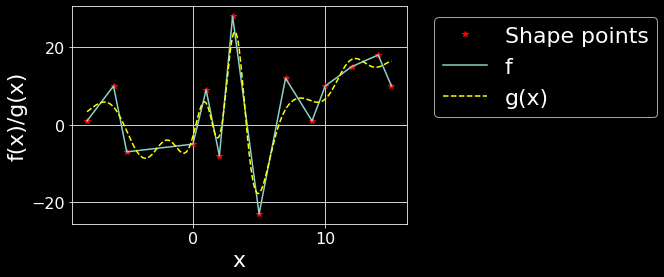

In [4]:
'''Plot comparison of f and g_best_vec'''
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.plot(Shape[:,0], new_f,label='f')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_2,'--',label='g(x)', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [6]:
'''L2 norm error'''
def f_integrand(x):
    return i_p(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func1(np.array([x]),c_star_vec)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = g_best_vec_func1(np.array([x]),c_star_vec)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 48.02674674169492
quadrature error = 2.3455668921675997e-06

||f-g||_L2 = 12.018225617834338
quadrature error = 1.4261308933782857e-06

Relative error =  24.275529 %


<span style="color:blue">**Explanation:**</span>
End points are not maching as we have not put any constrains at the end points.

### <span style="color:blue">[1.3)](#toa)(15 pts) Constrain the end points of the approximation in 1.2) and compute the relative error. Show in a plot a comparison of the constrained and unconstrained results. Explain the method to constrain the end points and whether the method was effective in this case.
</span><a id="a13"></a>

/var/folders/y5/wqhp_9z90sjccw_gdkz9bb380000gn/T/ipykernel_86197/1020884101.py:24: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  b_vec_c[int(handel_index(p)+i)]= (quad(load_c,x_min,x_max,args=(p,i),limit=1000)[0])+load_c(x_min,p,i)+load_c(x_max,p,i)#(basis(x_min,x_p[p],shift,sigma_p[p],i)*i_p(x_min))+(basis(x_max,x_p[p],shift,sigma_p[p],i)*i_p(x_max))


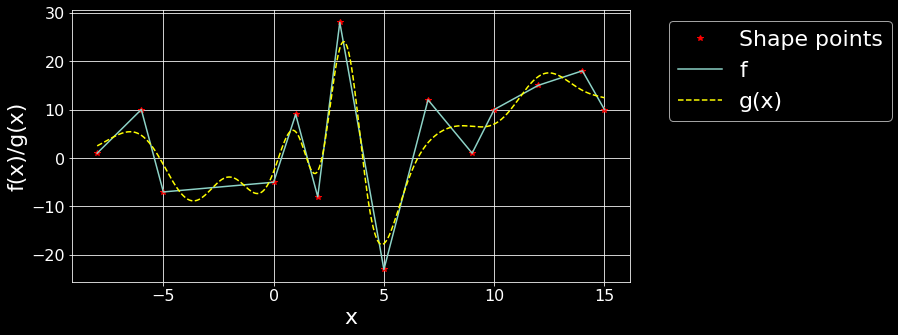

In [7]:
'''Plot comparison of f and g_best_vec with constrained end points'''
def g_int_c(x,p,i,q,j):
    g_it_c=(basis(x,x_p[p],shift,sigma_p[p],i)*basis(x,x_p[q],shift,sigma_p[q],j))
    return g_it_c
'''Gram Matrix'''
gram_mtrx_c=np.zeros(((np.sum(2*N)+len(N)),(np.sum(2*N)+len(N))))

for p in range(P):
    for i in range(2*N[p]+1):
        for q in range(P):
            for j in range(2*N[q]+1):
                gram_mtrx_c[int(handel_index(p)+i),int(handel_index(q)+j)] = (quad(g_int_c,x_min,x_max,args=(p,i,q,j),limit=10000)[0])+g_int_c(x_min,p,i,q,j)+g_int_c(x_max,p,i,q,j)#(basis(x_min,x_p[p],shift,sigma_p[p],i)*basis(x_min,x_p[p],shift,sigma_p[p],j))+(basis(x_max,x_p[p],shift,sigma_p[p],i)*basis(x_max,x_p[p],shift,sigma_p[p],j))
    

                
def load_c(x,p,i):
    load_el_c=(basis(x,x_p[p],shift,sigma_p[p],i)*i_p(x))
    return load_el_c

b_vec_c = np.zeros((np.sum(2*N)+len(N)))

for p in range(len(N)):
    for i in range(2*N[p]+1):
        b_vec_c[int(handel_index(p)+i)]= (quad(load_c,x_min,x_max,args=(p,i),limit=1000)[0])+load_c(x_min,p,i)+load_c(x_max,p,i)#(basis(x_min,x_p[p],shift,sigma_p[p],i)*i_p(x_min))+(basis(x_max,x_p[p],shift,sigma_p[p],i)*i_p(x_max))

c_star_vec_c = solve(gram_mtrx_c, b_vec_c)
def g_best_vec_func_c(x_pts,c_star_vec):
    a_mtrx = final_matrix(x_pts)
    return a_mtrx@c_star_vec_c

m=22      
n_pts = max(2*m, 350)
x_pts = np.linspace(x_min, x_max, n_pts)
g_best_vec_c = g_best_vec_func_c(x_pts,c_star_vec_c)


#print(x_pts)        
#print(g_best_vec_c-g_best_vec_2)       
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.plot(Shape[:,0], Shape[:,1],label='f')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_c,'--',label='g(x)', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [8]:
'''L2 norm error'''
def f_integrand(x):
    return i_p(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func_c(np.array([x]),c_star_vec_c)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = g_best_vec_func_c(np.array([x]),c_star_vec_c)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')

||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 47.19395439889378
quadrature error = 5.253154115051408e-06

||f-g||_L2 = 12.472190117658258
quadrature error = 3.2551167528225416e-06

Relative error =  25.192488 %


/var/folders/y5/wqhp_9z90sjccw_gdkz9bb380000gn/T/ipykernel_86197/3263209316.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)


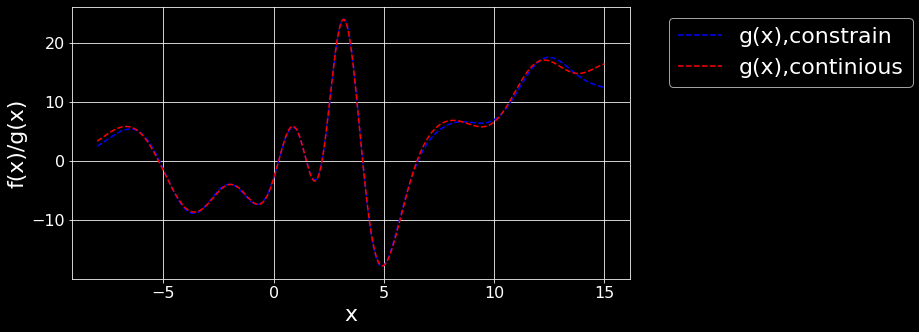

In [9]:
'''Code for comparison of methods'''
#plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
#plt.plot(Shape[:,0], Shape[:,1],label='f')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_c,'--',label='g(x),constrain', color='blue')
plt.plot(x_pts,g_best_vec_2,'--',label='g(x),continious', color='red')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<span style="color:blue">**Explanation:**</span>


To constrain the derivative I minimize the following equation:
$$\Phi_2= \min_{c*}[\Phi_1+(f(a)-g(a))^2+(f(b)-g(b))^2] $$

This leads to **Gram Matrix** and **Load vector** as:
$${(G)}_{i,j} = (\phi_i, \phi_j) + \phi_i(a)\phi_j(a) + \phi_i(b)\phi_j(b)$$
$$(b)_i=(f,\phi_i)+f(a)\phi_i(a)+f(b)\phi_i(b)$$

After building these matrix we solve the following equation for *C**:
$$(G)_{i,j}C^*= (b)_j$$

<p>In this approximation as we aer minimising the end point distance between approximate and target function. During this minimization, the seperation in intermideat point between the target and approximation function may increase which leads to high relative error in the approxomation. This can also be seen from the calculated errors:
    <ol>
        <li>Relative error in constrain case =  25.192488 %
        <li>Relative error in non constrain case = 24.275529 %

## <span style="color:blue">[Assignment 2 (65 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(35 pts) Approximate the piecewise linear function of 1.1) using Fourier Basis functions using 8 modes so that both the end points and the derivative at the end points are constrained by the corresponding values of the target function. Compute the relative error. Explain the method you developed and your results.</span><a id="a21"></a>

/var/folders/y5/wqhp_9z90sjccw_gdkz9bb380000gn/T/ipykernel_86197/2526498885.py:71: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  b_vec_c_dev[i]= (quad(load_c,x_min,x_max,args=(i),limit=10000)[0])+load_c(x_min,i)+load_c(x_max,i)+(FourierBasis_dev(x_min,i)*f_a_dev)+(FourierBasis_dev(x_max,i)*f_b_dev)#(basis(x_min,x_p[p],shift,sigma_p[p],i)*i_p(x_min))+(basis(x_max,x_p[p],shift,sigma_p[p],i)*i_p(x_max))


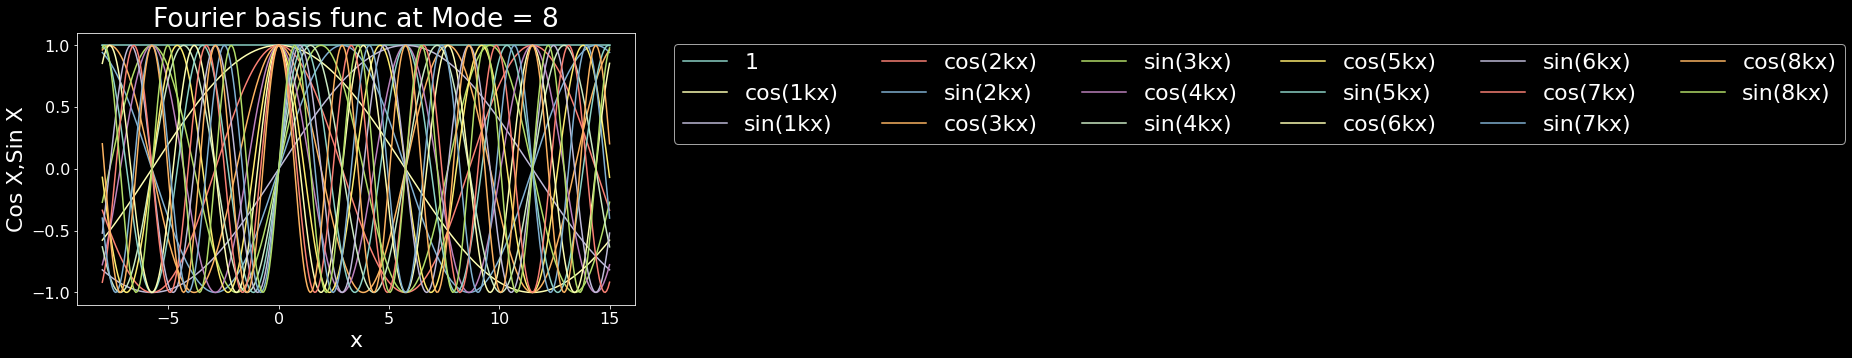

In [10]:
'''Build the basis functions list'''
N=[8]
P=len(N)

def FourierBasis(x_pts,j):
    #Z_b=np.zeros((len(x),2*N+1))
    #for j in range((2*N+1)):
    if (j==0):
        Z_b=1
    elif (j%2)==1:
        Z_b=np.cos(((j//2)+1)*K*x_pts)
    elif (j%2)==0:
        Z_b=np.sin((j//2)*K*x_pts)
    return Z_b


def FourierBasis_matrix(x_pts):
    Z_M=np.zeros((len(x_pts),2*N[0]+1))
    for i in range (len(x_pts)):
        for j in range((2*N[0]+1)):
            Z_M[i,j]= FourierBasis(x_pts[i],j)
    return np.array(Z_M)

def FourierBasis_dev(x_pts,j):
    if (j==0):
        Z_b=0
    elif (j%2)==1:
        Z_b=-(((j//2)+1)*K*np.sin(((j//2)+1)*K*x_pts))
    elif (j%2)==0:
        Z_b=(((j//2))*K*np.cos((j//2)*K*x_pts))
    return Z_b


def dev_multi(x,p,i,q,j):
    return (FourierBasis_dev(x,i)*FourierBasis_dev(x,j))

def g_int_c(x,p,i,q,j):
    g_it_c=(FourierBasis(x,i)*FourierBasis(x,j))
    return g_it_c

def f_das(x):
    dx=np.array(10**(-6))
    derivative=((i_p(x+dx)-i_p(x))/dx)
    return derivative
#print(f_das(x_min))
#print(f_das(x_max))
'''Gram Matrix'''
gram_mtrx_c_dev=np.zeros(((np.sum(2*N)+len(N)),(np.sum(2*N)+len(N))))

for p in range(P):
    for i in range(2*N[p]+1):
        for q in range(P):
            for j in range(2*N[q]+1):
                gram_mtrx_c_dev[int(handel_index(p)+i),int(handel_index(q)+j)] = (quad(g_int_c,x_min,x_max,args=(p,i,q,j),limit=10000)[0])+g_int_c(x_min,p,i,q,j)+g_int_c(x_max,p,i,q,j)+dev_multi(x_min,p,i,q,j)+dev_multi(x_max,p,i,q,j)#(basis(x_min,x_p[p],shift,sigma_p[p],i)*basis(x_min,x_p[p],shift,sigma_p[p],j))+(basis(x_max,x_p[p],shift,sigma_p[p],i)*basis(x_max,x_p[p],shift,sigma_p[p],j))
    

"""derivative at ends"""
#f_a= ()/
f_b_dev= (10-18)/(15-14)
f_a_dev=(10-1)/(-6+8)
#print(f_a_dev,f_b_dev)

def load_c(x,i):
    load_el_c=(FourierBasis(x,i)*i_p(x))
    return load_el_c


b_vec_c_dev = np.zeros((np.sum(2*N)+len(N)))

for i in range(2*N[0]+1):
    b_vec_c_dev[i]= (quad(load_c,x_min,x_max,args=(i),limit=10000)[0])+load_c(x_min,i)+load_c(x_max,i)+(FourierBasis_dev(x_min,i)*f_a_dev)+(FourierBasis_dev(x_max,i)*f_b_dev)#(basis(x_min,x_p[p],shift,sigma_p[p],i)*i_p(x_min))+(basis(x_max,x_p[p],shift,sigma_p[p],i)*i_p(x_max))

c_star_vec_c_dev = solve(gram_mtrx_c_dev, b_vec_c_dev)

def g_best_vec_func_c_dev(x_pts,c_star_vec_c_dev):
    a_mtrx = FourierBasis_matrix(x_pts)
    return a_mtrx@c_star_vec_c_dev


m=22      
n_pts = max(2*m, 350)
x_pts = np.linspace(x_min, x_max, n_pts)
g_best_vec_c_dev = g_best_vec_func_c_dev(x_pts,c_star_vec_c_dev)

def Plot(Z_M,x_pts):
    for i in range(len(Z_M[0])):
        if i==0:
            plt.plot(x_pts,Z_M[:,0],label='1')
        elif i%2==1:
            plt.plot(x_pts,Z_M[:,i], label='cos(%ikx)'%(((i/2)+0.5)))
        elif i%2==0 and i!=0:
            plt.plot(x_pts,Z_M[:,i], label='sin(%ikx)'%(i/2))
        for j in range(len(Z_M[0])//2):
            plt.legend( ncol=6, bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.rcParams["figure.figsize"] = (10,5)
        plt.xlabel('x'); plt.ylabel('Cos X,Sin X')
        plt.title('Fourier basis func at Mode = %i'%N[0])
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
    return(plt.show())


Z_M=FourierBasis_matrix(x_pts)
Plot(Z_M,x_pts)
       




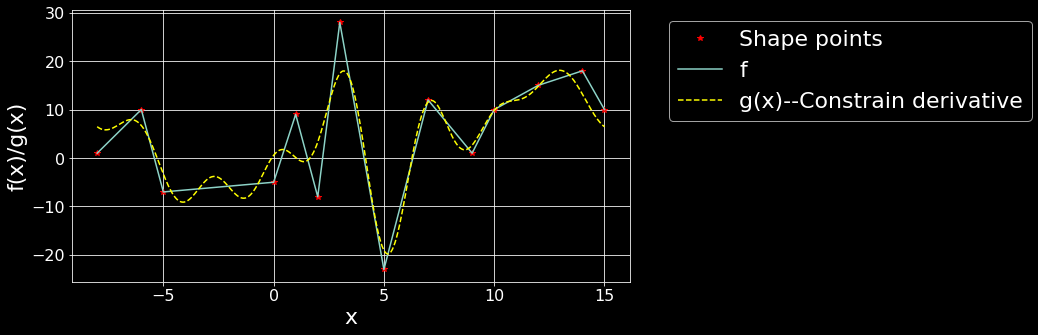

In [11]:
'''Plot comparison of f and g_best_vec with constrained values and derivative at end points'''
plt.plot(Shape[:,0], Shape[:,1], '*', color='red',label='Shape points')
plt.plot(Shape[:,0], Shape[:,1],label='f')
plt.grid()
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(x_pts,g_best_vec_c_dev,'--',label='g(x)--Constrain derivative', color='yellow')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x');plt.ylabel("f(x)/g(x)")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [12]:
'''L2 norm error'''
def f_integrand(x):
    return i_p(x)**2
f_integral = quad(f_integrand, x_min, x_max, limit=1000)
f_l2=np.sqrt(f_integral)

print('||f||_L2 =%10.6f'%f_l2[0])
print('quadrature error =%10.6e'%f_l2[1])

def g2_integrand(x):
    g_vec = g_best_vec_func_c_dev(np.array([x]),c_star_vec_c_dev)
    return g_vec**2

print('')

g2_integral, error = quad(g2_integrand, x_min, x_max, limit=1000)
print('||g||_L2 =', math.sqrt(g2_integral))
print('quadrature error =', error)

def f_minus_g_2_integrand(x):
    f_x = i_p(np.array([x]))
    g_vec = g_best_vec_func_c_dev(np.array([x]),c_star_vec_c_dev)
    return (f_x-g_vec)**2

print('')

f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)
print('||f-g||_L2 =', math.sqrt(f_minus_g_2_integral))
print('quadrature error =', error)
r_err=(math.sqrt(f_minus_g_2_integral)/np.sqrt(f_integral)*100)
print('')
print('Relative error = %10.6f'%r_err[0],'%')




||f||_L2 = 49.507575
quadrature error =5.392697e-03

||g||_L2 = 47.070518447014884
quadrature error = 3.270849247699603e-09

||f-g||_L2 = 13.68240185798903
quadrature error = 7.324167390964731e-05

Relative error =  27.636987 %


/var/folders/y5/wqhp_9z90sjccw_gdkz9bb380000gn/T/ipykernel_86197/2118343945.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  f_minus_g_2_integral, error = quad(f_minus_g_2_integrand, x_min, x_max, limit=1000)


<span style="color:blue">**Explanation:**</span>

To constrain the derivative at the end point I build the following following matrix:
$$G_{i,j}= (\phi_i,\phi_j)+\phi_i(a)\phi_j(a)+\phi_i(b)\phi_j(b)+\phi_i'(a)\phi_j'(a)+\phi_i'(b)\phi_j'(b)$$
$$b_i=(f,\phi_i)+f(a)\phi_i(a)+f(b)\phi_i(b)+f'(a)\phi_i'(a)+f'(b)\phi_i'(b)$$

and then we solve the following matrix equation for $C^*$.
$$G_{i,j} = C^* b_i$$




### <span style="color:blue">[2.2)](#toa)(30 pts) Show numerically why the derivative at the end points cannot match the target function derivatives. Explain.</span><a id="a22"></a>

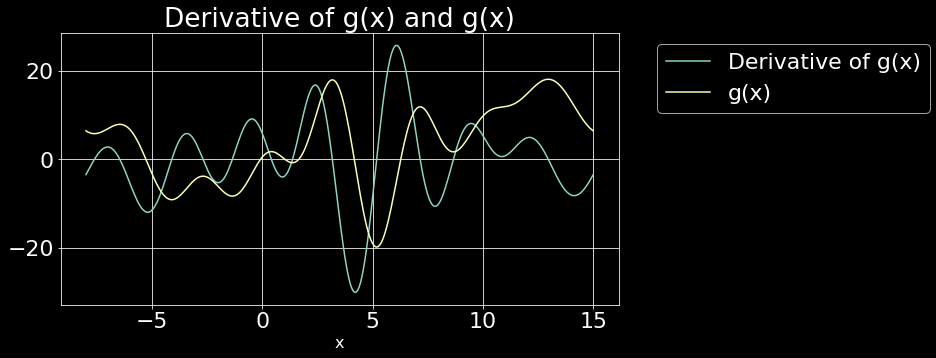

Derivative of g(x) at x_min= -3.444225  and Derivative of target func at x_min=   4.500000
Derivative of g(x) at x_min= -3.444225 and Derivative of target func at x_min= = -8.000000


In [13]:
"""derivative of g"""
def g_dev_x(x):
    g_das=0
    for i in range(N[0]):
        g_das+= -(c_star_vec_c_dev[(2*i)+1]*(i+1)*K*np.sin((i+1)*K*x))+(c_star_vec_c_dev[(2*i)+2]*(i+1)*K*np.cos((i+1)*K*x))
    return g_das

g_dev_x_min=g_dev_x(x_min)
g_dev_x_max=g_dev_x(x_max)
g_dev_x=g_dev_x(x_pts)
plt.plot(x_pts,g_dev_x,label='Derivative of g(x)')
plt.plot(x_pts,g_best_vec_c_dev,label='g(x)')
plt.xlabel("x",fontsize=16)
plt.grid()
plt.title('Derivative of g(x) and g(x)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()
print("Derivative of g(x) at x_min=%10.6f"%g_dev_x_min ," and Derivative of target func at x_min= %10.6f"%f_a_dev)
print("Derivative of g(x) at x_min=%10.6f"%g_dev_x_max, 'and Derivative of target func at x_min= =%10.6f'%f_b_dev)

#print(g_best_vec_c_dev[-1],g_best_vec_c_dev[0])
#print(g_dev_x)
#print((g_best_vec_c_dev[2]-g_best_vec_c_dev[1])/(x_pts[2]-x_pts[1]))

<span style="color:blue">**Explanation:**</span>
<p>We can see at the both ends the value of  $g'(x)$ is same. But the analitical value value of the derivative from the target function is different at the two ends. Not only that, the derivative of the target function at the both ends have different sign which is is not in the case of the $g'(x)$(having same sign and same value).
<p>The fourier function workes on a period of 2$\pi$ therofore at the ends it will repet its value. So the derivative at the end points cannot match the target function derivatives. 

## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>

Initially I dont understand why error increases as we constrain the endpoints. But I have figured it out later how it works.